In [1]:
import numpy as np
import astroML
import socket
import os
import datetime
import pandas as pd
import pickle

from matplotlib import pyplot as plt
from astroML.time_series import\
    lomb_scargle, lomb_scargle_BIC, lomb_scargle_bootstrap

from astroML.time_series import \
    generate_power_law

%matplotlib inline

print('Current workstation: '+str(socket.gethostname()))
if socket.gethostname()=='Osian':
    base_dir="/home/caplarn/Documents/Variability/MainSequence/"
else:
    #change below your directory where the data is to be stored
    base_dir="/export/data1/caplarn/Documents/Variability/MainSequence/"
os.chdir(base_dir)   
print('Current time: '+str(datetime.datetime.now()))       

Current workstation: iapetus
Current time: 2017-05-07 12:38:24.794921


# Creating light-curves

In [ ]:
# main function
def generate_LC(beta_value):
    y=astroML.time_series.generate_power_law(N=4000,dt=1,beta=beta_value)
    starting_point=np.random.randint(1,4000-400, size=1)[0]
    return y[starting_point:starting_point+400]

In [ ]:
# generates 1000 objects with 400 time steps with different slopes of power-spectrum density
for i in range(5):
    list_of_slopes=[1,1.5,2,2.5,3]
    amplitudes_of_slopes=[12,4.3,1,0.23,0.0485]
    x=np.full((1000),list_of_slopes[i])
    array_of_LC = amplitudes_of_slopes[i]*np.array([generate_LC(xi) for xi in x])
    sample_of_LC=pd.DataFrame(np.transpose(array_of_LC))
    sample_of_LC.to_pickle('sample_of_LC'+str(list_of_slopes[i])) 

# Small analysis of properties

In [ ]:
# here I import two samples to show their similarities and differences
sample_of_LC1=pickle.load(open( "sample_of_LC1", "rb" ))
sample_of_LC3=pickle.load(open( "sample_of_LC3", "rb" ))

In [ ]:
# the spread of the distribution is the same (4 different time points)
print((np.std(sample_of_LC1.ix[0]),np.std(sample_of_LC1.ix[100]),np.std(sample_of_LC1.ix[200]),np.std(sample_of_LC1.ix[300])))
print((np.std(sample_of_LC3.ix[0]),np.std(sample_of_LC3.ix[100]),np.std(sample_of_LC3.ix[200]),np.std(sample_of_LC3.ix[300])))

In [ ]:
# the mean of the distribution is the same and is bascially 0 (4 different time points)
print((np.mean(sample_of_LC1.ix[0]),np.mean(sample_of_LC1.ix[100]),np.mean(sample_of_LC1.ix[200]),np.mean(sample_of_LC1.ix[300])))
print((np.mean(sample_of_LC3.ix[0]),np.mean(sample_of_LC3.ix[100]),np.mean(sample_of_LC3.ix[200]),np.mean(sample_of_LC3.ix[300])))

In [ ]:
# the distribution look very similar
df = pd.DataFrame({'a': sample_of_LC1.ix[0],
                   'b': sample_of_LC3.ix[20]})
df.plot.hist(alpha=0.5,bins=20)

In [ ]:
# but there is difference in how sSFR plays around the mean; 3 red curves and 3 green curves for different objects from different sets
df = pd.DataFrame({'a': sample_of_LC1[0],
                   'b': sample_of_LC1[1],
                   'c': sample_of_LC1[2],
                   'd': sample_of_LC3[0],
                   'e': sample_of_LC3[1],
                   'f': sample_of_LC3[2]})
plt.figure
with pd.plot_params.use('x_compat', True):
    df.a.plot(color='r',alpha=0.5)
    df.b.plot(color='r',alpha=0.5)
    df.c.plot(color='r',alpha=0.5)
    df.d.plot(color='g',alpha=0.5)
    df.e.plot(color='g',alpha=0.5)
    df.f.plot(color='g',alpha=0.5)

In [ ]:
# small code below shows another difference. In first sample all objects are "well mixed", spend some time in 
# different parts of the main sequence. In second sample this is not the case... Some object have never been in
# the upper half

In [ ]:
def is_there_larger_0(x):
    if max(x)>0:
        return 1
    else:
        return 0


In [ ]:
number_of_times_object_in_upper_half_of_main_sequence_in_sample1 = []
for i in range(len(sample_of_LC1)):
    number_of_times_object_in_upper_half_of_main_sequence_in_sample1.append(is_there_larger_0(sample_of_LC1[i]))
number_of_times_object_in_upper_half_of_main_sequence_in_sample3 = []
for i in range(len(sample_of_LC3)):
    number_of_times_object_in_upper_half_of_main_sequence_in_sample3.append(is_there_larger_0(sample_of_LC3[i]))
print("Fraction of objects which have at least once been in upper half of MS in first sample:"+str(np.mean(number_of_times_object_in_upper_half_of_main_sequence_in_sample1))) 
print("Fraction of objects which have at least once been in upper half of MS in second sample:"+str(np.mean(number_of_times_object_in_upper_half_of_main_sequence_in_sample3)))    

# Creating the data with the break (simple example)

In [148]:
from DELCgen import *
# code is at https://github.com/samconnolly/DELightcurveSimulation
import scipy

In [149]:
delc = Simulate_DE_Lightcurve(BendingPL, (1.0,(10**-4),3,0,0.1),scipy.stats.norm,(0, 0.3),LClength=400)

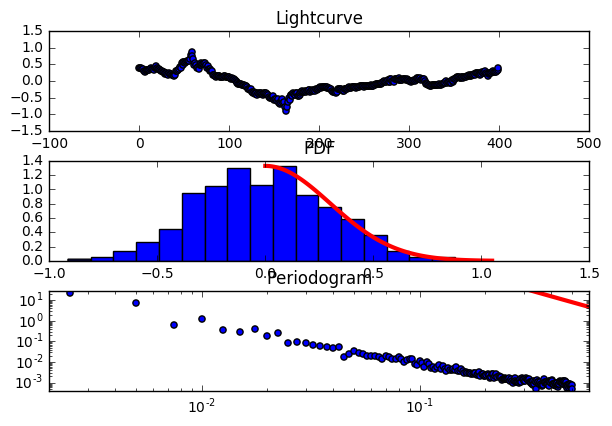

In [150]:
delc.Plot_Stats()

# Generating data with break - very slow - not a way to go!

In [151]:
list_of_slopes=[1,1.5,2,2.5,3]
amplitudes_of_slopes=[1,1,1,1,1]

In [152]:
os.chdir(base_dir)

In [153]:
# main function
def generate_LC_with_break(beta_value):
    delc= Simulate_DE_Lightcurve(BendingPL, (1.0,10**-4,beta_value,0,0.1),scipy.stats.norm,(0.0, 0.3),LClength=500)
    y=delc.flux
    starting_point=np.random.randint(1,500-400, size=1)[0]
    return y[starting_point:starting_point+400]

In [154]:
print(datetime.datetime.now())
# generates 10 objects with 400 time steps with different slopes of power-spectrum density
for i in range(5):
    #print "Progres"+"\r{0}".format((float(i))/((6)*100), 
    x=np.full((10),list_of_slopes[i])
    array_of_LC = amplitudes_of_slopes[i]*np.array([generate_LC_with_break(xi) for xi in x])
    sample_of_LC=pd.DataFrame(np.transpose(array_of_LC))
    sample_of_LC.to_pickle('sample_of_LC_with_break'+str(list_of_slopes[i])) 
print(datetime.datetime.now())    

2017-05-07 14:25:30.227917
2017-05-07 14:25:41.028179


# Testing how to create the same code via 'map' method

In [65]:
x=np.full((10),list_of_slopes[1])

In [61]:
# main function
def generate_LC_with_break(beta_value):
    delc= Simulate_DE_Lightcurve(BendingPL, (1.0,5*10**-1,beta_value,0,0.1),scipy.stats.norm,(0.0, 0.3),LClength=500)
    y=delc.flux
    starting_point=np.random.randint(1,500-400, size=1)[0]
    return y[starting_point:starting_point+400]

In [66]:
def test_fun(xv):
    return xv**2

In [67]:
print(datetime.datetime.now())
serial_result = map(lambda xv:generate_LC_with_break(xv), x)
print(datetime.datetime.now())

2017-05-07 13:39:28.295637
2017-05-07 13:39:30.619539


# Parallel code 

In [167]:
# terminal command: ipcluster start -n 4

from IPython.display import display
import ipyparallel as ipp
from ipyparallel.error import TimeoutError

rc=ipp.Client()
with rc[:].sync_imports():
    import numpy as np
    import DELCgen
    import scipy
dview = rc[:]
dview.block = True

importing numpy on engine(s)
importing DELCgen on engine(s)
importing scipy on engine(s)


In [215]:
@dview.remote(block = True)
# main function
def generate_LC_with_break(beta_value):
    from DELCgen import *
    delc= Simulate_DE_Lightcurve(BendingPL, (1.0,(10**-2),beta_value,0,0.1),scipy.stats.norm,(0.0, 0.3),LClength=500)
    y=delc.flux
    starting_point=np.random.randint(1,500-400, size=1)[0]
    return y[starting_point:starting_point+400]

<ipython-input-215-a6507aeb6418>:1: SyntaxWarning: import * only allowed at module level
  @dview.remote(block = True)


In [ ]:
print(datetime.datetime.now())
# generates 100*4 (number of cores that one started) objects with 400 time steps with different slopes of power-spectrum density
for i in range(5):
    #print "Progres"+"\r{0}".format((float(i))/((6)*100), 
    x=np.full((100),list_of_slopes[i])
    parallel_result= np.array(map(lambda xv:generate_LC_with_break(xv), x))
    h=np.ndarray.flatten(parallel_result,order='C')
    h.resize((100*4,400))
    sample_of_LC=pd.DataFrame(np.transpose(h))
    sample_of_LC.to_pickle('sample_of_LC_with_break'+str(list_of_slopes[i])) 
print(datetime.datetime.now())

2017-05-07 14:45:44.712784


# Small analysis of properties

In [217]:
# here I import two samples to show their similarities and differences
sample_of_LC1=pickle.load(open( "sample_of_LC_with_break1", "rb" ))
sample_of_LC15=pickle.load(open( "sample_of_LC_with_break1.5", "rb" ))
sample_of_LC2=pickle.load(open( "sample_of_LC_with_break2", "rb" ))
sample_of_LC25=pickle.load(open( "sample_of_LC_with_break2.5", "rb" ))
sample_of_LC3=pickle.load(open( "sample_of_LC_with_break3", "rb" ))

In [218]:
# the spread of the distribution is the same (4 different time points)
print((np.std(sample_of_LC1.ix[0]),np.std(sample_of_LC1.ix[100]),np.std(sample_of_LC1.ix[200]),np.std(sample_of_LC1.ix[300])))
print((np.std(sample_of_LC15.ix[0]),np.std(sample_of_LC15.ix[100]),np.std(sample_of_LC15.ix[200]),np.std(sample_of_LC15.ix[300])))
print((np.std(sample_of_LC2.ix[0]),np.std(sample_of_LC2.ix[100]),np.std(sample_of_LC2.ix[200]),np.std(sample_of_LC2.ix[300])))
print((np.std(sample_of_LC25.ix[0]),np.std(sample_of_LC25.ix[100]),np.std(sample_of_LC25.ix[200]),np.std(sample_of_LC25.ix[300])))
print((np.std(sample_of_LC3.ix[0]),np.std(sample_of_LC3.ix[100]),np.std(sample_of_LC3.ix[200]),np.std(sample_of_LC3.ix[300])))

(0.090732528112546285, 0.097259331846454189, 0.089975640535995396, 0.087648459978981227)
(0.0990722651289168, 0.096294186602439838, 0.068188818125501358, 0.094993922168127673)
(0.077899165723478561, 0.095612353196136368, 0.096438457919168358, 0.099574545683303456)
(0.087654345612078369, 0.093174503999031599, 0.098955402432107958, 0.09581124222643736)
(0.12104667987520218, 0.087490693930815794, 0.083973487215348711, 0.099860138172808546)


In [219]:
# the mean of the distribution is the same and is bascially 0 (4 different time points)
print((np.mean(sample_of_LC1.ix[0]),np.mean(sample_of_LC1.ix[100]),np.mean(sample_of_LC1.ix[200]),np.mean(sample_of_LC1.ix[300])))
print((np.mean(sample_of_LC15.ix[0]),np.mean(sample_of_LC15.ix[100]),np.mean(sample_of_LC15.ix[200]),np.mean(sample_of_LC15.ix[300])))
print((np.mean(sample_of_LC2.ix[0]),np.mean(sample_of_LC2.ix[100]),np.mean(sample_of_LC2.ix[200]),np.mean(sample_of_LC2.ix[300])))
print((np.mean(sample_of_LC25.ix[0]),np.mean(sample_of_LC25.ix[100]),np.mean(sample_of_LC25.ix[200]),np.mean(sample_of_LC25.ix[300])))
print((np.mean(sample_of_LC3.ix[0]),np.mean(sample_of_LC3.ix[100]),np.mean(sample_of_LC3.ix[200]),np.mean(sample_of_LC3.ix[300])))

(0.00067530032001469399, 0.0039915417748962586, -0.0026832976180521093, 0.0055200519978282044)
(0.0053234815653825816, -0.0040740760422309022, -0.0041259752114695238, 0.00063352842615783467)
(-0.0017257567738426694, 0.0064633597971663851, 0.0047605519931492183, -0.0072037981360111988)
(0.0070310545726463758, 0.0019504693002683092, 0.0065247006227295672, 0.0018060193831977722)
(-0.012919953466387114, 0.010244796959573746, -0.0015454505495379306, 0.0020380003764138089)


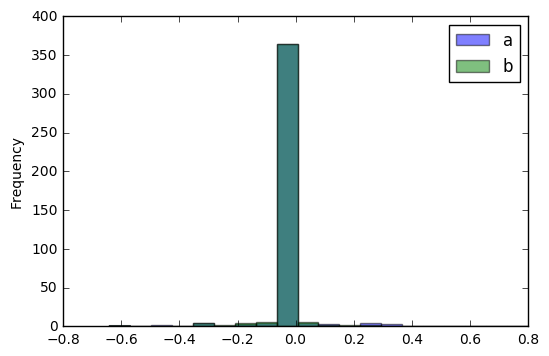

In [220]:
# the distribution look very similar
df = pd.DataFrame({'a': sample_of_LC1.ix[0],
                   'b': sample_of_LC3.ix[20]})
df.plot.hist(alpha=0.5,bins=20)

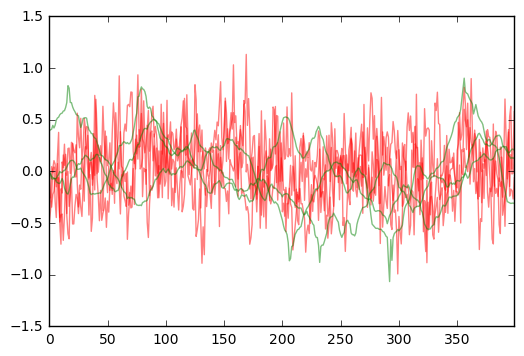

In [214]:
# but there is difference in how sSFR plays around the mean; 3 red curves and 3 green curves for different objects from different sets
df = pd.DataFrame({'a': sample_of_LC1[0],
                   'b': sample_of_LC1[1],
                   'c': sample_of_LC1[2],
                   'd': sample_of_LC3[0],
                   'e': sample_of_LC3[1],
                   'f': sample_of_LC3[2]})
plt.figure
with pd.plot_params.use('x_compat', True):
    df.a.plot(color='r',alpha=0.5)
    df.b.plot(color='r',alpha=0.5)
    df.c.plot(color='r',alpha=0.5)
    df.d.plot(color='g',alpha=0.5)
    df.e.plot(color='g',alpha=0.5)
    df.f.plot(color='g',alpha=0.5)